# Task 02 - Car Price Prediction
## Building your second intelligent algorithm for a regression task.

Débora Mayumi Rissato - 5288223

Douglas Decicino de Andrade - 10883512

Paulino Ribeiro Villas Boas - 2950178

Renan Silva Chun - 10691817

Renan de Oliveira da Cruz - 10801090

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import random

random.seed(19)

## 1) Análise dos dados brutos.

Inicialmente, inserimos os dados e apresentamos as primeiras cinco observações.

O conjunto de dados foi retirado da Web do Car Dehko e contém informações sobre mais de 5000 carros que estavam à venda.

A base de dados utilizada é composta pelas seguintes colunas:

Name, Year, Selling Price, Km Driver, Fuel, Seller_Type, Transmission, Owner, Mileage, Engine, Max Power, Torque e Seats.

O **objetivo** é desenvolver um modelo que possa propor um preço de venda sugerido para quando um novo usuário registrar um carro na plataforma OLX.

In [2]:
train = pd.read_csv("../input/usp-pj02/train_car_details.csv",index_col=0)
train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
Id,,,,,,,,,,,,,
1,Hyundai Santro GLS I - Euro I,1999,80000,110000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
2,Maruti Ertiga VDI,2012,459999,87000,Diesel,Individual,Manual,First Owner,20.77 kmpl,1248 CC,88.76 bhp,200Nm@ 1750rpm,7.0
3,BMW 3 Series 320d Luxury Line,2010,1100000,102000,Diesel,Dealer,Automatic,First Owner,19.62 kmpl,1995 CC,187.74 bhp,400Nm@ 1750-2500rpm,5.0
4,Tata New Safari DICOR 2.2 EX 4x2,2009,229999,212000,Diesel,Individual,Manual,Third Owner,11.57 kmpl,2179 CC,138.1 bhp,320Nm@ 1700-2700rpm,7.0
5,Toyota Fortuner 3.0 Diesel,2010,800000,125000,Diesel,Individual,Manual,Second Owner,11.5 kmpl,2982 CC,171 bhp,343Nm@ 1400-3400rpm,7.0


In [3]:
test = pd.read_csv("../input/usp-pj02/test_car_details.csv")
test.head()

,Id,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,1,Tata Indigo LS,2008,60000,Diesel,Individual,Manual,Third Owner,17.0 kmpl,1405 CC,70 bhp,"13.5@ 2,500(kgm@ rpm)",5.0
1,2,Maruti Baleno Delta 1.2,2019,30000,Petrol,Individual,Manual,First Owner,21.4 kmpl,1197 CC,83.1 bhp,115Nm@ 4000rpm,5.0
2,3,Maruti Swift Dzire AMT ZDI,2017,80000,Diesel,Individual,Automatic,First Owner,28.4 kmpl,1248 CC,74.02 bhp,190Nm@ 2000rpm,5.0
3,4,Mahindra XUV500 W10 2WD,2018,30000,Diesel,Individual,Manual,First Owner,16.0 kmpl,2179 CC,140 bhp,330Nm@ 1600-2800rpm,7.0
4,5,Hyundai Elite i20 Asta Option BSIV,2019,35000,Petrol,Individual,Manual,First Owner,18.6 kmpl,1197 CC,81.86 bhp,117nm@ 4000rpm,5.0


In [4]:
test.tail()

,Id,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
2370,2371,Volkswagen Vento Diesel Highline,2011,125000,Diesel,Individual,Manual,Fourth & Above Owner,20.54 kmpl,1598 CC,103.6 bhp,250Nm@ 1500-2500rpm,5.0
2371,2372,Hyundai Creta 1.6 CRDi SX Plus,2016,79000,Diesel,Dealer,Manual,First Owner,19.67 kmpl,1582 CC,126.2 bhp,259.9Nm@ 1900-2750rpm,5.0
2372,2373,Ford EcoSport 1.5 Diesel Titanium Plus BSIV,2017,45000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1498 CC,98.96 bhp,205Nm@ 1750-3250rpm,5.0
2373,2374,Toyota Fortuner 4x4 AT,2016,52000,Diesel,Dealer,Automatic,First Owner,12.55 kmpl,2982 CC,168.5 bhp,360Nm@ 1400-3200rpm,7.0
2374,2375,Honda Amaze V CVT Petrol BSIV,2019,7032,Petrol,Trustmark Dealer,Automatic,First Owner,19.0 kmpl,1199 CC,88.76 bhp,110Nm@ 4800rpm,5.0


Checagem de algumas caracteristicas  da nossa base de treino


In [5]:
train.describe()

,year,selling_price,km_driven,seats
count,5689.000000,5.689000e+03,5.689000e+03,5532.000000
mean,2013.741607,6.277744e+05,6.987759e+04,5.422993
std,4.054875,7.784000e+05,5.124731e+04,0.961395
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.500000e+05,3.500000e+04,5.000000
50%,2014.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.670000e+05,9.800000e+04,5.000000
max,2020.000000,7.200000e+06,1.500000e+06,10.000000


In [6]:
train.duplicated().any()

True

In [7]:
train.shape
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5689 entries, 1 to 5689
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5689 non-null   object 
 1   year           5689 non-null   int64  
 2   selling_price  5689 non-null   int64  
 3   km_driven      5689 non-null   int64  
 4   fuel           5689 non-null   object 
 5   seller_type    5689 non-null   object 
 6   transmission   5689 non-null   object 
 7   owner          5689 non-null   object 
 8   mileage        5532 non-null   object 
 9   engine         5532 non-null   object 
 10  max_power      5538 non-null   object 
 11  torque         5531 non-null   object 
 12  seats          5532 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 622.2+ KB


Pelas informaçoes da base temos que a a base de treinos possui 5689 linhas distintas
sendo as mileage, engine, max_power, torque, seats as unicas que possuem valores nulos.

Verificaremos agora a porcentagem de nulos que existem em nossa para base para sabermos se e relevante mantermos eles ou não.

In [8]:
null_values = pd.concat([train.isna().sum(), round((train.isna().sum()/train.shape[0])*100, 2)], axis = 1).reset_index()
null_values.columns = ["Column", "Absolute", "Relative (%)"]
null_values

,Column,Absolute,Relative (%)
0,name,0,0.00
1,year,0,0.00
2,selling_price,0,0.00
3,km_driven,0,0.00
4,fuel,0,0.00
5,seller_type,0,0.00
6,transmission,0,0.00
7,owner,0,0.00
8,mileage,157,2.76
9,engine,157,2.76


## 2) Pré-Processamento dos Dados

### (2.1) Torque

Essa parte, por facilidade e prática, foi efetuado na linguagem de programação R.

In [9]:
import subprocess
subprocess.run('conda install -c conda-forge r-base', shell=True)
!pip install rpy2

     |████████████████████████████████| 187 kB 2.8 MB/s 
  Created wheel for rpy2: filename=rpy2-3.4.4-cp37-cp37m-linux_x86_64.whl size=308206 sha256=b7a2eb4f3557fadbb345adfda133e557122c87ff106748200930055d0c254c35
  Stored in directory: /root/.cache/pip/wheels/e7/57/83/5a2a4b5c837d8318c94b0113206ddba813f6b2a54b63dfc386
Successfully built rpy2


In [10]:

import rpy2 
%load_ext rpy2.ipython
%R require(ggplot2) 

0


In [11]:

import rpy2 

In [12]:
%%R -o train_data


training_function <- function (base) {
    base[base == ""] <- NA #preenchendo espaços vazios do dataset com NA

#Abaixo segue a extração de determinadas observações do dataframe, baseado no padrão em que estavam escritas a variável torque, utilizando regex
nmrpm <- base[grepl("^.*?Nm@.*?rpm.*?$" ,base$torque,ignore.case = TRUE),]

kgmrpm <- base[grepl("^.*?@.*?kgm@ rpm.*?$" ,base$torque,ignore.case = TRUE),]

kgmat <- base[grepl("^.*?KGM.*?at.*?$" ,base$torque,ignore.case = TRUE),]

nmat <- base[grepl("^.*?Nm.*?at.*?$" ,base$torque,ignore.case = TRUE),]

kgmrpm2 <- base[grepl("^.*?kgm@.*?0rpm.*?$" ,base$torque,ignore.case = TRUE),]

#Abaixo vamos excluir as letras e deixar apenas o valor numérico rspectivo ao torque na variável torque, 
#assim como já fazer a transformação das observações que estão emde Kgm para Nm utilizando a força G.

nmrpm$torque <- gsub("[Nn].*", "", nmrpm$torque)

kgmrpm$torque <- 9.807 * as.numeric(gsub( "@.*", "", kgmrpm$torque))

kgmat$torque <- 9.807 *  as.numeric(gsub("[Kk].*", "", kgmat$torque))

nmat$torque <- as.numeric(gsub("[N ].*", "", nmat$torque))

kgmrpm2$torque <- 9.807 * as.numeric(gsub("[Kk].*", "", kgmrpm2$torque))

#Segue abaixo as observações que sobraram que não foram pegas pelas regex.
obs_sobraram <- base[!grepl("^.*?Nm@.*?rpm.*?$" ,base$torque,ignore.case = TRUE) & 
               !grepl("^.*?@.*?kgm@ rpm.*?$" ,base$torque,ignore.case = TRUE)&
             !grepl("^.*?KGM.*?at.*?$" ,base$torque,ignore.case = TRUE)&
             !grepl("^.*?Nm.*?at.*?$" ,base$torque,ignore.case = TRUE)&
             !grepl("^.*?kgm@.*?0rpm.*?$" ,base$torque,ignore.case = TRUE),]


base2 <- rbind(nmrpm,kgmrpm,kgmat,nmat,kgmrpm2,obs_sobraram) #Concatenando os sub-dataframes com a variável torque tratada.

#Segue abaixo algumas observações que tiveram que ser substituidas a mão pois estavam muito diferentes,
# não valendo a pena utilizar regex (obs_sobraram).

base2$torque[base2$torque == "400Nm"] <- 400

base2$torque[base2$torque == "480Nm"] <- 480

base2$torque[base2$torque == "510@ 1600-2400"] <- 510

base2$torque[base2$torque == "400 Nm /2000 rpm"] <- 400

base2$torque[base2$torque == "210 / 1900"] <- 210

base2$torque[base2$torque == "110(11.2)@ 4800"] <- 110

base2$torque <- as.numeric(gsub("[N@].*", "", base2$torque))


#Foi feita uma análise de outlier para identificar possíveis observações erradas.

# print(ggplot(data = base2 ,aes(x = torque,y = selling_price)) + 
#           geom_point())

return (base2)
} 

train <- read.csv(file = "../input/usp-pj02/train_car_details.csv", header=T,sep=",", dec = ".")
train[train == ""] <- NA #preenchendo espaços vazios do dataset com NA
train_data <-  training_function(train)



In [13]:
%%R -o train_data
#Podemos ver acima 5 observações que aparentam comportamento estranho, com torque muito alto (maior que 700)
#Ao averiguar essas observações na internet, percebemos que realmente estavam erradas, e o valor do torque delas foi substituido abaixo.
#Muitas delas estavam como Kgm na base, porém o valor era em Nm, e na hora de multiplicar pela força G ficavam valores altíssimos.
#Segue abaixo então a substituição desses valores.
train_data[grepl("^.*?Maruti.*?SX4.*?$" ,train_data$name,ignore.case = TRUE),]$torque <- 145

train_data[grepl("^.*?Ford Ikon.*?1.6.*?$" ,train_data$name,ignore.case = TRUE),]$torque <- 137.298

train_data[train_data$name == "Tata Sumo CX 9 Seater",]$torque <- 250

train_data[train_data$name == "Tata Sumo GX 7 Str BSII",]$torque <- 250

train_data[train_data$name == "Tata Sumo EX 10/7 Str BSIII",]$torque <- 250

train_data[train_data$name == "Mahindra Logan Petrol 1.4 GLE",]$torque <- 110

train_data[train_data$name == "Maruti Zen D",]$torque <- 78

train_data$torque <- as.numeric(train_data$torque)


#Gráfico de selling_price por torque pós substituição dos valores errados.
# print(ggplot(data = train_data ,aes(x = torque,y = selling_price)) + 
#   geom_point()) 


train_data$torque <- as.numeric(train_data$torque)#Passando para numerico.

train_data <- train_data

In [14]:
%%R -o test_data 
test <- read.csv("../input/usp-pj02/test_car_details.csv", header=T,sep=",")

test[test == ""] <- NA

f <- test[!grepl("^.*?Nm@.*?rpm.*?$" ,test$torque,ignore.case = TRUE) & 
               !grepl("^.*?@.*?kgm@ rpm.*?$" ,test$torque,ignore.case = TRUE)&
             !grepl("^.*?KGM.*?at.*?$" ,test$torque,ignore.case = TRUE)&
             !grepl("^.*?Nm.*?at.*?$" ,test$torque,ignore.case = TRUE)&
             !grepl("^.*?kgm@.*?0rpm.*?$" ,test$torque,ignore.case = TRUE),]

x <- test[grepl("^.*?Nm@.*?rpm.*?$" ,test$torque,ignore.case = TRUE),]

y <- test[grepl("^.*?@.*?kgm@ rpm.*?$" ,test$torque,ignore.case = TRUE),]

z <- test[grepl("^.*?KGM.*?at.*?$" ,test$torque,ignore.case = TRUE),]

a <- test[grepl("^.*?Nm.*?at.*?$" ,test$torque,ignore.case = TRUE),]

b <- test[grepl("^.*?kgm@.*?0rpm.*?$" ,test$torque,ignore.case = TRUE),]

#################conversões###############

x$torque <- gsub("[Nn].*", "", x$torque)

y$torque <- 9.807 * as.numeric(gsub( "@.*", "", y$torque))

z$torque <- 9.807 *  as.numeric(gsub("[Kk].*", "", z$torque))

a$torque <- as.numeric(gsub("[N ].*", "", a$torque))

b$torque <- 9.807 * as.numeric(gsub("[Kk].*", "", b$torque))

########novo_dataframe##########
test2 <- rbind(x,y,z,a,b,f)

test2$torque[test2$torque == "400Nm"] <- 400

test2$torque[test2$torque == "510@ 1600-2400"] <- 510

test2$torque[test2$torque == "210 / 1900"] <- 210

test2$torque[test2$torque == "110(11.2)@ 4800"] <- 110

test2$torque <- as.numeric(gsub("[N@].*", "", test2$torque))

############################# substituindo valores de outliers errados a mão

test2[grepl("^.*?Maruti.*?SX4.*?$" ,test2$name,ignore.case = TRUE),]$torque <- 145

test2[grepl("^.*?Ford Ikon.*?1.6.*?$" ,test2$name,ignore.case = TRUE),]$torque <- 137.298

test2[test2$name == "Tata Sumo CX 9 Seater",]$torque <- 250

test2[test2$name == "Tata Sumo EX TC",]$torque <- 250

test2[test2$name == "Tata Sumo CX 10 Str BSIV",]$torque <- 250

test2[test2$name == "Tata Sumo EX 10/7 Str BSIII",]$torque <- 250

test2[test2$name == "Maruti Zen D",]$torque <- 78

 test2$torque <- as.numeric(test2$torque)
 rownames(test2) <- NULL
 test_data <- test2

In [15]:
test_data.loc[  test_data.loc[:, "Id"] == 1 , ]

,Id,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
2179,1,Tata Indigo LS,2008,60000,Diesel,Individual,Manual,Third Owner,17.0 kmpl,1405 CC,70 bhp,132.3945,5.0


In [16]:
print(test_data)

        Id                                name  year  km_driven    fuel  \
1        2             Maruti Baleno Delta 1.2  2019      30000  Petrol   
2        3          Maruti Swift Dzire AMT ZDI  2017      80000  Diesel   
3        4             Mahindra XUV500 W10 2WD  2018      30000  Diesel   
4        5  Hyundai Elite i20 Asta Option BSIV  2019      35000  Petrol   
5        6       Mahindra Bolero 2011-2019 SLX  2013     125000  Diesel   
...    ...                                 ...   ...        ...     ...   
2371  1953      Volvo XC40 D4 Inscription BSIV  2019      20000  Diesel   
2372  1974         Tata Sumo MKII Turbo 2.0 LX  2010     225000  Diesel   
2373  2077    Skoda Octavia Classic 1.9 TDI MT  2006     150000  Diesel   
2374  2129      Volvo XC40 D4 Inscription BSIV  2019      20000  Diesel   
2375  2204      Volvo XC40 D4 Inscription BSIV  2019      20000  Diesel   

     seller_type transmission         owner     mileage   engine  max_power  \
1     Individual    

In [17]:
test_data.tail()

,Id,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
2371,1953,Volvo XC40 D4 Inscription BSIV,2019,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400.0,5.0
2372,1974,Tata Sumo MKII Turbo 2.0 LX,2010,225000,Diesel,Individual,Manual,Third Owner,14.0 kmpl,1948 CC,90 bhp,190.0,9.0
2373,2077,Skoda Octavia Classic 1.9 TDI MT,2006,150000,Diesel,Individual,Manual,Third Owner,18.7 kmpl,1896 CC,66 bhp,210.0,5.0
2374,2129,Volvo XC40 D4 Inscription BSIV,2019,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400.0,5.0
2375,2204,Volvo XC40 D4 Inscription BSIV,2019,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400.0,5.0


In [18]:
train_data

,Id,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
2,2,Maruti Ertiga VDI,2012,459999,87000,Diesel,Individual,Manual,First Owner,20.77 kmpl,1248 CC,88.76 bhp,200.0,7.0
3,3,BMW 3 Series 320d Luxury Line,2010,1100000,102000,Diesel,Dealer,Automatic,First Owner,19.62 kmpl,1995 CC,187.74 bhp,400.0,5.0
4,4,Tata New Safari DICOR 2.2 EX 4x2,2009,229999,212000,Diesel,Individual,Manual,Third Owner,11.57 kmpl,2179 CC,138.1 bhp,320.0,7.0
5,5,Toyota Fortuner 3.0 Diesel,2010,800000,125000,Diesel,Individual,Manual,Second Owner,11.5 kmpl,2982 CC,171 bhp,343.0,7.0
6,6,Maruti Alto LX,2010,180000,25000,Petrol,Individual,Manual,Second Owner,19.7 kmpl,796 CC,46.3 bhp,62.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5516,5516,Maruti Omni LPG STD BSIV,1999,70000,100000,LPG,Individual,Manual,Fourth & Above Owner,NaN,NaN,NaN,NaN,NaN
5573,5573,Hyundai Santro Xing XL,2007,90000,64000,Petrol,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
5612,5612,Hyundai Santro GLS I - Euro II,2007,150000,60000,Petrol,Individual,Manual,Third Owner,NaN,NaN,NaN,NaN,NaN
5636,5636,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400.0,5.0


In [19]:
train_data = train_data.fillna(value=np.nan)

### (2.2) Name

Obtendo a primeira palavra presente na coluna de dados "name".

In [20]:
train_data["name1"] = np.zeros(len(train_data))
#train_data["name2"] = np.zeros(len(train_data))
train_data['name1'] = train_data['name'].str.split(' ').str.get(0)
test_data['name1'] = test_data['name'].str.split(' ').str.get(0)

In [21]:
test_data

,Id,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,name1
1,2,Maruti Baleno Delta 1.2,2019,30000,Petrol,Individual,Manual,First Owner,21.4 kmpl,1197 CC,83.1 bhp,115.0,5.0,Maruti
2,3,Maruti Swift Dzire AMT ZDI,2017,80000,Diesel,Individual,Automatic,First Owner,28.4 kmpl,1248 CC,74.02 bhp,190.0,5.0,Maruti
3,4,Mahindra XUV500 W10 2WD,2018,30000,Diesel,Individual,Manual,First Owner,16.0 kmpl,2179 CC,140 bhp,330.0,7.0,Mahindra
4,5,Hyundai Elite i20 Asta Option BSIV,2019,35000,Petrol,Individual,Manual,First Owner,18.6 kmpl,1197 CC,81.86 bhp,117.0,5.0,Hyundai
5,6,Mahindra Bolero 2011-2019 SLX,2013,125000,Diesel,Individual,Manual,Second Owner,15.96 kmpl,2523 CC,62.1 bhp,195.0,7.0,Mahindra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371,1953,Volvo XC40 D4 Inscription BSIV,2019,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400.0,5.0,Volvo
2372,1974,Tata Sumo MKII Turbo 2.0 LX,2010,225000,Diesel,Individual,Manual,Third Owner,14.0 kmpl,1948 CC,90 bhp,190.0,9.0,Tata
2373,2077,Skoda Octavia Classic 1.9 TDI MT,2006,150000,Diesel,Individual,Manual,Third Owner,18.7 kmpl,1896 CC,66 bhp,210.0,5.0,Skoda
2374,2129,Volvo XC40 D4 Inscription BSIV,2019,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400.0,5.0,Volvo


In [22]:
train_data

,Id,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,name1
2,2,Maruti Ertiga VDI,2012,459999,87000,Diesel,Individual,Manual,First Owner,20.77 kmpl,1248 CC,88.76 bhp,200.0,7.0,Maruti
3,3,BMW 3 Series 320d Luxury Line,2010,1100000,102000,Diesel,Dealer,Automatic,First Owner,19.62 kmpl,1995 CC,187.74 bhp,400.0,5.0,BMW
4,4,Tata New Safari DICOR 2.2 EX 4x2,2009,229999,212000,Diesel,Individual,Manual,Third Owner,11.57 kmpl,2179 CC,138.1 bhp,320.0,7.0,Tata
5,5,Toyota Fortuner 3.0 Diesel,2010,800000,125000,Diesel,Individual,Manual,Second Owner,11.5 kmpl,2982 CC,171 bhp,343.0,7.0,Toyota
6,6,Maruti Alto LX,2010,180000,25000,Petrol,Individual,Manual,Second Owner,19.7 kmpl,796 CC,46.3 bhp,62.0,5.0,Maruti
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5516,5516,Maruti Omni LPG STD BSIV,1999,70000,100000,LPG,Individual,Manual,Fourth & Above Owner,NaN,NaN,NaN,NaN,NaN,Maruti
5573,5573,Hyundai Santro Xing XL,2007,90000,64000,Petrol,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN,Hyundai
5612,5612,Hyundai Santro GLS I - Euro II,2007,150000,60000,Petrol,Individual,Manual,Third Owner,NaN,NaN,NaN,NaN,NaN,Hyundai
5636,5636,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400.0,5.0,Volvo


### (2.3) Mileage

In [23]:
count_km_l = 0
count_km_kg = 0
count_nan = 0

for ind in train_data.index:
  if type(train_data.loc[ind,"mileage"]) is float:
    count_nan += 1
  else:
    aux = train_data.loc[ind,"mileage"].split()[1]
    if aux == "kmpl": count_km_l += 1
    if aux == "km/kg": count_km_kg += 1

print("Número de NaN: ", count_nan)
print("Número de Km/L: ", count_km_l)
print("Número de Km/Kg: ", count_km_kg)

Número de NaN:  157
Número de Km/L:  5469
Número de Km/Kg:  63


In [24]:
count_km_l = 0
count_km_kg = 0
count_nan = 0

for ind in test_data.index:
  if type(test_data.loc[ind,"mileage"]) is float:
    count_nan += 1
  else:
    aux = test_data.loc[ind,"mileage"].split()[1]
    if aux == "kmpl": count_km_l += 1
    if aux == "km/kg": count_km_kg += 1

print("Número de NaN: ", count_nan)
print("Número de Km/L: ", count_km_l)
print("Número de Km/Kg: ", count_km_kg)

Número de NaN:  0
Número de Km/L:  2350
Número de Km/Kg:  25


A densidade do GLP é apriximadamente 0.58 kg/L http://www.foxpetroleum.net/LPG.php#:~:text=LPG%20at%20atmospheric%20pressure%20and,C.

Temos que:

$$
densidade = \frac{massa}{volume} = \frac{kg}{L} = \frac{km}{L} \cdot \frac{kg}{km} =\frac{km/L}{km/kg}
$$

Logo,

$$
km/kg = \frac{km/L}{densidade} 
$$

O valor da densidade da diesel a base de petróleo é 800 $km/m^3$, ou equivalentemente, $0,8 km/L$.

In [25]:
densidade = 0.8
train_data['mileage'] = train_data.mileage.astype(str)
for ind in train_data.index:
  if not(type(train_data.loc[ind,"mileage"]) is float):
    if train_data.loc[ind,"mileage"].split()[1] != "kmpl":
      train_data.loc[ind,"mileage"] =  float(train_data.loc[ind,"mileage"].split()[0])
    else:
      train_data.loc[ind,"mileage"] = float(train_data.loc[ind,"mileage"].split()[0]) / densidade

train_data["mileage"] = pd.to_numeric(train_data["mileage"], downcast="float")

In [26]:
densidade = 0.8
test_data['mileage'] = test_data.mileage.astype(str)
for ind in test_data.index:
  if not(type(test_data.loc[ind,"mileage"]) is float):
    if test_data.loc[ind,"mileage"].split()[1] != "kmpl":
      test_data.loc[ind,"mileage"] = float(test_data.loc[ind,"mileage"].split()[0])
    else:
      test_data.loc[ind,"mileage"] = float(test_data.loc[ind,"mileage"].split()[0]) / densidade

test_data["mileage"] = pd.to_numeric(test_data["mileage"], downcast="float")

Tem-se abaixo um histograma para a variável "mileage".

<Figure size 720x576 with 0 Axes>

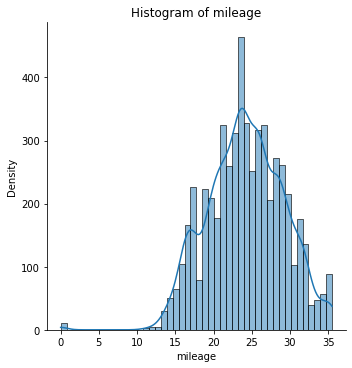

In [27]:
plt.figure(figsize=((10,8)))

sns.displot(data=train_data, x="mileage", kde=True)
  
plt.title("Histogram of mileage")
plt.xlabel("mileage")
plt.ylabel("Density")
plt.show()

<Figure size 720x576 with 0 Axes>

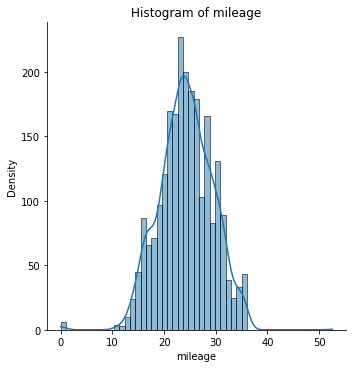

In [28]:
plt.figure(figsize=((10,8)))

sns.displot(data=test_data, x="mileage", kde=True)
  
plt.title("Histogram of mileage")
plt.xlabel("mileage")
plt.ylabel("Density")
plt.show()

Por meio da figura acima notamos que nos dados, para a variável "mileage", contém alguns valores zeros. Isso é um fato impossível, pois o rendimento não pode ser igual a zero.

In [29]:
train_data.loc[  train_data.loc[:, "mileage"] == 0 , :]

,Id,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,name1
442,442,Hyundai Santro Xing (Non-AC),2010,110000,80000,Petrol,Individual,Manual,Second Owner,0.0,1086 CC,62.1 bhp,96.1000,5.0,Hyundai
2440,2440,Hyundai Santro Xing (Non-AC),2010,110000,80000,Petrol,Individual,Manual,Second Owner,0.0,1086 CC,62.1 bhp,96.1000,5.0,Hyundai
2568,2568,Volkswagen Polo GT TSI BSIV,2014,574000,28080,Petrol,Dealer,Automatic,First Owner,0.0,1197 CC,103.25 bhp,175.0000,5.0,Volkswagen
2575,2575,Hyundai Santro Xing GL,2008,105000,128000,Petrol,Individual,Manual,First Owner,0.0,1086 CC,62 bhp,96.1000,5.0,Hyundai
3363,3363,Hyundai Santro Xing GL,2011,150000,40000,Petrol,Individual,Manual,Fourth & Above Owner,0.0,1086 CC,62 bhp,96.1000,5.0,Hyundai
3411,3411,Mahindra Bolero Pik-Up CBC 1.7T,2019,722000,80000,Diesel,Individual,Manual,First Owner,0.0,2523 CC,70 bhp,200.0000,2.0,Mahindra
3523,3523,Hyundai Santro Xing (Non-AC),2013,184000,15000,Petrol,Individual,Manual,First Owner,0.0,1086 CC,62.1 bhp,96.1000,5.0,Hyundai
4649,4649,Mercedes-Benz GLC 220d 4MATIC,2017,3300000,60000,Diesel,Dealer,Automatic,First Owner,0.0,1950 CC,194 bhp,400.0000,5.0,Mercedes-Benz
5340,5340,Tata Indica Vista Aura Safire Anniversary Edition,2009,135000,28900,Petrol,Individual,Manual,Second Owner,0.0,1172 CC,65 bhp,96.1086,5.0,Tata
490,490,Land Rover Freelander 2 TD4 HSE,2013,1650000,64788,Diesel,Dealer,Automatic,First Owner,0.0,2179 CC,115 bhp,400.0000,5.0,Land


In [30]:
test_data.loc[  test_data.loc[:, "mileage"] == 0 , :]


,Id,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,name1
104,116,Hyundai Santro Xing GL,2009,90000,Petrol,Individual,Manual,Second Owner,0.0,1086 CC,62 bhp,96.1,5.0,Hyundai
897,976,Hyundai Santro Xing GL,2010,110000,Petrol,Individual,Manual,First Owner,0.0,1086 CC,62 bhp,96.1,5.0,Hyundai
1432,1556,Mahindra Bolero Pik-Up FB 1.7T,2020,5000,Diesel,Individual,Manual,First Owner,0.0,2523 CC,70 bhp,200.0,2.0,Mahindra
1867,2028,Hyundai Santro Xing GL,2008,40000,Petrol,Individual,Manual,First Owner,0.0,1086 CC,62 bhp,96.1,5.0,Hyundai
2030,2205,Volkswagen Polo GT TSI BSIV,2014,28100,Petrol,Dealer,Automatic,First Owner,0.0,1197 CC,103.25 bhp,175.0,5.0,Volkswagen
2360,834,Mercedes-Benz M-Class ML 350 4Matic,2011,110000,Diesel,Individual,Automatic,Third Owner,0.0,2987 CC,165 bhp,510.0,5.0,Mercedes-Benz


Na Tabela acima percebemos que as instancias que possuem valor zero na columa "mileage" contém todos os dados das demais variáveis, logo, excluir essas instâncias não é uma opção. Alternativamente, podemos criar clusters e substituir esses valores zeros pela média do cluster correspondente.  

In [31]:
null_values = pd.concat([train_data.isna().sum(), round((train_data.isna().sum()/train_data.shape[0])*100, 2)], axis = 1).reset_index()
null_values.columns = ["Column", "Absolute", "Relative (%)"]
null_values

,Column,Absolute,Relative (%)
0,Id,0,0.00
1,name,0,0.00
2,year,0,0.00
3,selling_price,0,0.00
4,km_driven,0,0.00
5,fuel,0,0.00
6,seller_type,0,0.00
7,transmission,0,0.00
8,owner,0,0.00
9,mileage,157,2.76




temos que 2% aproximadamente da nossa base possui valores nulos logo removeremos esses valores além de que em linhas que possuem NaN quase todas as outras informacoes também sao NaN


Abaixo excluímos dos NaN do dataset.

In [32]:
train_data.dropna(inplace=True)
train_data

,Id,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,name1
2,2,Maruti Ertiga VDI,2012,459999,87000,Diesel,Individual,Manual,First Owner,25.962500,1248 CC,88.76 bhp,200.0,7.0,Maruti
3,3,BMW 3 Series 320d Luxury Line,2010,1100000,102000,Diesel,Dealer,Automatic,First Owner,24.525000,1995 CC,187.74 bhp,400.0,5.0,BMW
4,4,Tata New Safari DICOR 2.2 EX 4x2,2009,229999,212000,Diesel,Individual,Manual,Third Owner,14.462500,2179 CC,138.1 bhp,320.0,7.0,Tata
5,5,Toyota Fortuner 3.0 Diesel,2010,800000,125000,Diesel,Individual,Manual,Second Owner,14.375000,2982 CC,171 bhp,343.0,7.0,Toyota
6,6,Maruti Alto LX,2010,180000,25000,Petrol,Individual,Manual,Second Owner,24.625000,796 CC,46.3 bhp,62.0,5.0,Maruti
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4729,4729,Tata Indigo TDI,2012,135000,146000,Diesel,Individual,Manual,First Owner,24.512501,1405 CC,70 bhp,135.4,5.0,Tata
4790,4790,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,22.500000,1969 CC,190 bhp,400.0,5.0,Volvo
4808,4808,Tata Sumo MKII Turbo 2.0 LX,2010,235000,90000,Diesel,Individual,Manual,First Owner,17.500000,1948 CC,90 bhp,190.0,9.0,Tata
5294,5294,Skoda Octavia Rider 1.9 AT TDI,2008,210000,120000,Diesel,Individual,Manual,Second Owner,23.375000,1896 CC,66 bhp,210.0,5.0,Skoda


Abaixos selecionamos dados para realizar a análise de agrupamentos. Fizemos também a padronização dos dados, tal procedimento é indicado para a realização de agrupamentos, uma vez que tal metodologia utiliza cálculos de distâncias.

E, por fim, realizamos o gráfico do Elbow Method.

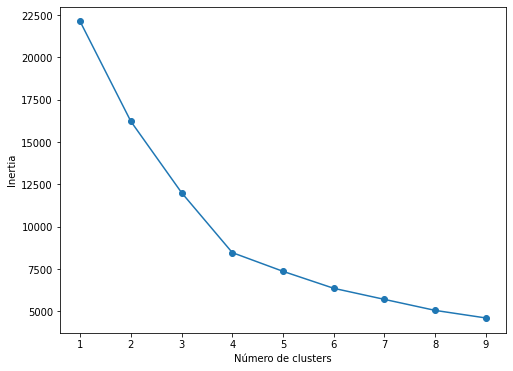

In [33]:
# dados para cálculo do cluster
dados_aux = train_data.loc[:, ["year", "selling_price", "km_driven", "seats"]]
dados_aux.index = train_data.loc[:, "mileage"]

df_scaled = dados_aux.copy()
# padronização dos dados
df_scaled.iloc[:, :] = StandardScaler().fit_transform(dados_aux)

inertias = []
for k in np.arange(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)

# Plotando o gráfico do Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, 10), inertias, '-o')
plt.xlabel('Número de clusters')
plt.ylabel('Inertia');

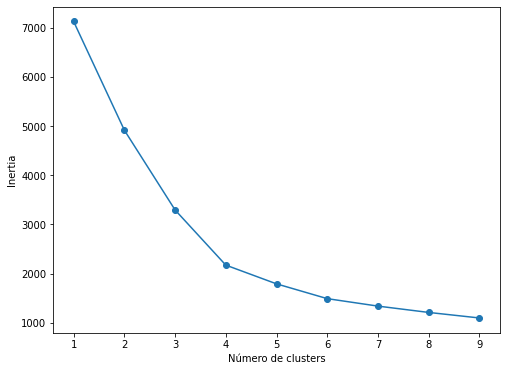

In [34]:
# dados para cálculo do cluster
dados_aux_test = test_data.loc[:, ["year", "km_driven", "seats"]]
dados_aux_test.index = test_data.loc[:, "mileage"]

df_scaled_test = dados_aux_test.copy()
# padronização dos dados
df_scaled_test.iloc[:, :] = StandardScaler().fit_transform(dados_aux_test)

inertias_test = []
for k in np.arange(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled_test)
    inertias_test.append(kmeans.inertia_)

# Plotando o gráfico do Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, 10), inertias_test, '-o')
plt.xlabel('Número de clusters')
plt.ylabel('Inertia');

In [35]:
n_clusters = 7

kmeans = KMeans(n_clusters = n_clusters, random_state = 19)
df_scaled_test['cluster'] = kmeans.fit_predict(df_scaled_test)

test_data['cluster'] = np.array(df_scaled_test.loc[:,'cluster'])
test_data

,Id,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,name1,cluster
1,2,Maruti Baleno Delta 1.2,2019,30000,Petrol,Individual,Manual,First Owner,26.750000,1197 CC,83.1 bhp,115.0,5.0,Maruti,5
2,3,Maruti Swift Dzire AMT ZDI,2017,80000,Diesel,Individual,Automatic,First Owner,35.500000,1248 CC,74.02 bhp,190.0,5.0,Maruti,5
3,4,Mahindra XUV500 W10 2WD,2018,30000,Diesel,Individual,Manual,First Owner,20.000000,2179 CC,140 bhp,330.0,7.0,Mahindra,2
4,5,Hyundai Elite i20 Asta Option BSIV,2019,35000,Petrol,Individual,Manual,First Owner,23.250000,1197 CC,81.86 bhp,117.0,5.0,Hyundai,5
5,6,Mahindra Bolero 2011-2019 SLX,2013,125000,Diesel,Individual,Manual,Second Owner,19.950001,2523 CC,62.1 bhp,195.0,7.0,Mahindra,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371,1953,Volvo XC40 D4 Inscription BSIV,2019,20000,Diesel,Individual,Automatic,First Owner,22.500000,1969 CC,190 bhp,400.0,5.0,Volvo,5
2372,1974,Tata Sumo MKII Turbo 2.0 LX,2010,225000,Diesel,Individual,Manual,Third Owner,17.500000,1948 CC,90 bhp,190.0,9.0,Tata,4
2373,2077,Skoda Octavia Classic 1.9 TDI MT,2006,150000,Diesel,Individual,Manual,Third Owner,23.375000,1896 CC,66 bhp,210.0,5.0,Skoda,1
2374,2129,Volvo XC40 D4 Inscription BSIV,2019,20000,Diesel,Individual,Automatic,First Owner,22.500000,1969 CC,190 bhp,400.0,5.0,Volvo,5


O gráfico de cotovelo acima, a grosso modo, consiste em tomar a soma de quadrado de cada observação até o centróide do cluster mais próximo, sendo assim, a ideia é tomar um valor de $k$ (Número de clusters) que resulta em uma $Inertia$ que seja, arbitrariamente, suficientemente pequeno. Como para  $k=7$  resulta em valor pequeno tomaremos $k=7$. 

Abaixo fizemos a análise de agrupamento.

In [36]:
n_clusters = 7

kmeans = KMeans(n_clusters = n_clusters, random_state = 19)
df_scaled['cluster'] = kmeans.fit_predict(df_scaled)

train_data['cluster'] = np.array(df_scaled.loc[:,'cluster'])
train_data

,Id,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,name1,cluster
2,2,Maruti Ertiga VDI,2012,459999,87000,Diesel,Individual,Manual,First Owner,25.962500,1248 CC,88.76 bhp,200.0,7.0,Maruti,1
3,3,BMW 3 Series 320d Luxury Line,2010,1100000,102000,Diesel,Dealer,Automatic,First Owner,24.525000,1995 CC,187.74 bhp,400.0,5.0,BMW,6
4,4,Tata New Safari DICOR 2.2 EX 4x2,2009,229999,212000,Diesel,Individual,Manual,Third Owner,14.462500,2179 CC,138.1 bhp,320.0,7.0,Tata,2
5,5,Toyota Fortuner 3.0 Diesel,2010,800000,125000,Diesel,Individual,Manual,Second Owner,14.375000,2982 CC,171 bhp,343.0,7.0,Toyota,2
6,6,Maruti Alto LX,2010,180000,25000,Petrol,Individual,Manual,Second Owner,24.625000,796 CC,46.3 bhp,62.0,5.0,Maruti,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4729,4729,Tata Indigo TDI,2012,135000,146000,Diesel,Individual,Manual,First Owner,24.512501,1405 CC,70 bhp,135.4,5.0,Tata,6
4790,4790,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,22.500000,1969 CC,190 bhp,400.0,5.0,Volvo,5
4808,4808,Tata Sumo MKII Turbo 2.0 LX,2010,235000,90000,Diesel,Individual,Manual,First Owner,17.500000,1948 CC,90 bhp,190.0,9.0,Tata,2
5294,5294,Skoda Octavia Rider 1.9 AT TDI,2008,210000,120000,Diesel,Individual,Manual,Second Owner,23.375000,1896 CC,66 bhp,210.0,5.0,Skoda,0


Abaixo tem a média de cada cluster.

In [37]:
mean_clusters = []
for ind in range(n_clusters):
  mean_clusters.append( np.mean( train_data.loc[  train_data.loc[:, "cluster"] == ind, "mileage"]))

for ind in range(n_clusters):
  print("Média mileage cluster ",ind, ": ", mean_clusters[ind])

Média mileage cluster  0 :  21.471601
Média mileage cluster  1 :  20.332602
Média mileage cluster  2 :  17.241148
Média mileage cluster  3 :  26.622084
Média mileage cluster  4 :  18.875
Média mileage cluster  5 :  21.049074
Média mileage cluster  6 :  25.491575


In [38]:
mean_clusters = []
for ind in range(n_clusters):
  mean_clusters.append( np.mean( test_data.loc[  test_data.loc[:, "cluster"] == ind, "mileage"]))

for ind in range(n_clusters):
  print("Média mileage cluster ",ind, ": ", mean_clusters[ind])

Média mileage cluster  0 :  26.223595
Média mileage cluster  1 :  21.450457
Média mileage cluster  2 :  20.44362
Média mileage cluster  3 :  23.25
Média mileage cluster  4 :  16.940977
Média mileage cluster  5 :  26.196444
Média mileage cluster  6 :  24.614233


Substituição dos valores zeros da coluna "mileage".

In [39]:
for ind in test_data.loc[  test_data.loc[:, "mileage"] == 0 , :].index:
  for cluster in range(n_clusters):
    if test_data.loc[ ind, "cluster"] == cluster:
      test_data.loc[ ind, "mileage"] = mean_clusters[cluster]

In [40]:
for ind in train_data.loc[  train_data.loc[:, "mileage"] == 0 , :].index:
  for cluster in range(n_clusters):
    if train_data.loc[ ind, "cluster"] == cluster:
      train_data.loc[ ind, "mileage"] = mean_clusters[cluster]

Abaixo notamos que não possui mais valores zeros em "mileage".

In [41]:
test_data.loc[  test_data.loc[:, "mileage"] == 0 , :]

,Id,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,name1,cluster


In [42]:
train_data.loc[  train_data.loc[:, "mileage"] == 0 , :]

,Id,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,name1,cluster


In [43]:
test_data.drop('cluster', axis=1, inplace=True)
test_data

,Id,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,name1
1,2,Maruti Baleno Delta 1.2,2019,30000,Petrol,Individual,Manual,First Owner,26.750000,1197 CC,83.1 bhp,115.0,5.0,Maruti
2,3,Maruti Swift Dzire AMT ZDI,2017,80000,Diesel,Individual,Automatic,First Owner,35.500000,1248 CC,74.02 bhp,190.0,5.0,Maruti
3,4,Mahindra XUV500 W10 2WD,2018,30000,Diesel,Individual,Manual,First Owner,20.000000,2179 CC,140 bhp,330.0,7.0,Mahindra
4,5,Hyundai Elite i20 Asta Option BSIV,2019,35000,Petrol,Individual,Manual,First Owner,23.250000,1197 CC,81.86 bhp,117.0,5.0,Hyundai
5,6,Mahindra Bolero 2011-2019 SLX,2013,125000,Diesel,Individual,Manual,Second Owner,19.950001,2523 CC,62.1 bhp,195.0,7.0,Mahindra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371,1953,Volvo XC40 D4 Inscription BSIV,2019,20000,Diesel,Individual,Automatic,First Owner,22.500000,1969 CC,190 bhp,400.0,5.0,Volvo
2372,1974,Tata Sumo MKII Turbo 2.0 LX,2010,225000,Diesel,Individual,Manual,Third Owner,17.500000,1948 CC,90 bhp,190.0,9.0,Tata
2373,2077,Skoda Octavia Classic 1.9 TDI MT,2006,150000,Diesel,Individual,Manual,Third Owner,23.375000,1896 CC,66 bhp,210.0,5.0,Skoda
2374,2129,Volvo XC40 D4 Inscription BSIV,2019,20000,Diesel,Individual,Automatic,First Owner,22.500000,1969 CC,190 bhp,400.0,5.0,Volvo


Ainda, retiramos a coluna "cluster", pois ela não será mais utilizada.

In [44]:
train_data.drop('cluster', axis=1, inplace=True)
train_data

,Id,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,name1
2,2,Maruti Ertiga VDI,2012,459999,87000,Diesel,Individual,Manual,First Owner,25.962500,1248 CC,88.76 bhp,200.0,7.0,Maruti
3,3,BMW 3 Series 320d Luxury Line,2010,1100000,102000,Diesel,Dealer,Automatic,First Owner,24.525000,1995 CC,187.74 bhp,400.0,5.0,BMW
4,4,Tata New Safari DICOR 2.2 EX 4x2,2009,229999,212000,Diesel,Individual,Manual,Third Owner,14.462500,2179 CC,138.1 bhp,320.0,7.0,Tata
5,5,Toyota Fortuner 3.0 Diesel,2010,800000,125000,Diesel,Individual,Manual,Second Owner,14.375000,2982 CC,171 bhp,343.0,7.0,Toyota
6,6,Maruti Alto LX,2010,180000,25000,Petrol,Individual,Manual,Second Owner,24.625000,796 CC,46.3 bhp,62.0,5.0,Maruti
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4729,4729,Tata Indigo TDI,2012,135000,146000,Diesel,Individual,Manual,First Owner,24.512501,1405 CC,70 bhp,135.4,5.0,Tata
4790,4790,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,22.500000,1969 CC,190 bhp,400.0,5.0,Volvo
4808,4808,Tata Sumo MKII Turbo 2.0 LX,2010,235000,90000,Diesel,Individual,Manual,First Owner,17.500000,1948 CC,90 bhp,190.0,9.0,Tata
5294,5294,Skoda Octavia Rider 1.9 AT TDI,2008,210000,120000,Diesel,Individual,Manual,Second Owner,23.375000,1896 CC,66 bhp,210.0,5.0,Skoda


### (2.4) **Age**


Para o modelo se ajustar melhor aos dados criaremos também a variável age

In [45]:
test_data['age'] = 2021 - test_data['year']
test_data.drop(['year'],axis = 1,inplace = True)
train_data.head()

,Id,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,name1
2,2,Maruti Ertiga VDI,2012,459999,87000,Diesel,Individual,Manual,First Owner,25.9625,1248 CC,88.76 bhp,200.0,7.0,Maruti
3,3,BMW 3 Series 320d Luxury Line,2010,1100000,102000,Diesel,Dealer,Automatic,First Owner,24.5250,1995 CC,187.74 bhp,400.0,5.0,BMW
4,4,Tata New Safari DICOR 2.2 EX 4x2,2009,229999,212000,Diesel,Individual,Manual,Third Owner,14.4625,2179 CC,138.1 bhp,320.0,7.0,Tata
5,5,Toyota Fortuner 3.0 Diesel,2010,800000,125000,Diesel,Individual,Manual,Second Owner,14.3750,2982 CC,171 bhp,343.0,7.0,Toyota
6,6,Maruti Alto LX,2010,180000,25000,Petrol,Individual,Manual,Second Owner,24.6250,796 CC,46.3 bhp,62.0,5.0,Maruti


In [46]:
train_data['age'] = 2021 - train_data['year']
train_data.drop(['year'],axis = 1,inplace = True)
train_data.head()

,Id,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,name1,age
2,2,Maruti Ertiga VDI,459999,87000,Diesel,Individual,Manual,First Owner,25.9625,1248 CC,88.76 bhp,200.0,7.0,Maruti,9
3,3,BMW 3 Series 320d Luxury Line,1100000,102000,Diesel,Dealer,Automatic,First Owner,24.5250,1995 CC,187.74 bhp,400.0,5.0,BMW,11
4,4,Tata New Safari DICOR 2.2 EX 4x2,229999,212000,Diesel,Individual,Manual,Third Owner,14.4625,2179 CC,138.1 bhp,320.0,7.0,Tata,12
5,5,Toyota Fortuner 3.0 Diesel,800000,125000,Diesel,Individual,Manual,Second Owner,14.3750,2982 CC,171 bhp,343.0,7.0,Toyota,11
6,6,Maruti Alto LX,180000,25000,Petrol,Individual,Manual,Second Owner,24.6250,796 CC,46.3 bhp,62.0,5.0,Maruti,11


### (2.5) **Outras Tratativas**


Temos que Nossa base de treino Pós Pré-processamento:

In [47]:
train_data.drop(['name','Id'], axis=1, inplace=True)
train_data

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,name1,age
2,459999,87000,Diesel,Individual,Manual,First Owner,25.962500,1248 CC,88.76 bhp,200.0,7.0,Maruti,9
3,1100000,102000,Diesel,Dealer,Automatic,First Owner,24.525000,1995 CC,187.74 bhp,400.0,5.0,BMW,11
4,229999,212000,Diesel,Individual,Manual,Third Owner,14.462500,2179 CC,138.1 bhp,320.0,7.0,Tata,12
5,800000,125000,Diesel,Individual,Manual,Second Owner,14.375000,2982 CC,171 bhp,343.0,7.0,Toyota,11
6,180000,25000,Petrol,Individual,Manual,Second Owner,24.625000,796 CC,46.3 bhp,62.0,5.0,Maruti,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4729,135000,146000,Diesel,Individual,Manual,First Owner,24.512501,1405 CC,70 bhp,135.4,5.0,Tata,9
4790,3800000,20000,Diesel,Individual,Automatic,First Owner,22.500000,1969 CC,190 bhp,400.0,5.0,Volvo,2
4808,235000,90000,Diesel,Individual,Manual,First Owner,17.500000,1948 CC,90 bhp,190.0,9.0,Tata,11
5294,210000,120000,Diesel,Individual,Manual,Second Owner,23.375000,1896 CC,66 bhp,210.0,5.0,Skoda,13


test_data.drop(['name','Id'], axis=1, inplace=True)
train_data

In [48]:
Id_listTest = test_data['Id']
test_data.drop(['name','Id'], axis=1, inplace=True)
test_data

,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,name1,age
1,30000,Petrol,Individual,Manual,First Owner,26.750000,1197 CC,83.1 bhp,115.0,5.0,Maruti,2
2,80000,Diesel,Individual,Automatic,First Owner,35.500000,1248 CC,74.02 bhp,190.0,5.0,Maruti,4
3,30000,Diesel,Individual,Manual,First Owner,20.000000,2179 CC,140 bhp,330.0,7.0,Mahindra,3
4,35000,Petrol,Individual,Manual,First Owner,23.250000,1197 CC,81.86 bhp,117.0,5.0,Hyundai,2
5,125000,Diesel,Individual,Manual,Second Owner,19.950001,2523 CC,62.1 bhp,195.0,7.0,Mahindra,8
...,...,...,...,...,...,...,...,...,...,...,...,...
2371,20000,Diesel,Individual,Automatic,First Owner,22.500000,1969 CC,190 bhp,400.0,5.0,Volvo,2
2372,225000,Diesel,Individual,Manual,Third Owner,17.500000,1948 CC,90 bhp,190.0,9.0,Tata,11
2373,150000,Diesel,Individual,Manual,Third Owner,23.375000,1896 CC,66 bhp,210.0,5.0,Skoda,15
2374,20000,Diesel,Individual,Automatic,First Owner,22.500000,1969 CC,190 bhp,400.0,5.0,Volvo,2


In [49]:
train_data.engine.unique()
train_data[['engine','metric_engine']] = train_data.engine.str.split(" ",expand=True,)

train_data.max_power.unique()
train_data[['max_power','metric_max_power']] = train_data.max_power.str.split(" ",expand=True,)

train_data.drop(['metric_engine','metric_max_power'],axis=1,inplace=True)

train_data['engine'] = pd.to_numeric(train_data['engine'])
train_data['max_power'] = pd.to_numeric(train_data['max_power'])
#train_data['seats'] = train_data['seats'].astype(str)
train_data.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,name1,age
2,459999,87000,Diesel,Individual,Manual,First Owner,25.9625,1248,88.76,200.0,7.0,Maruti,9
3,1100000,102000,Diesel,Dealer,Automatic,First Owner,24.5250,1995,187.74,400.0,5.0,BMW,11
4,229999,212000,Diesel,Individual,Manual,Third Owner,14.4625,2179,138.10,320.0,7.0,Tata,12
5,800000,125000,Diesel,Individual,Manual,Second Owner,14.3750,2982,171.00,343.0,7.0,Toyota,11
6,180000,25000,Petrol,Individual,Manual,Second Owner,24.6250,796,46.30,62.0,5.0,Maruti,11


In [50]:
test_data.engine.unique()
test_data[['engine','metric_engine']] = test_data.engine.str.split(" ",expand=True,)

test_data.max_power.unique()
test_data[['max_power','metric_max_power']] = test_data.max_power.str.split(" ",expand=True,)

test_data.drop(['metric_engine','metric_max_power'],axis=1,inplace=True)

test_data['engine'] = pd.to_numeric(test_data['engine'])
test_data['max_power'] = pd.to_numeric(test_data['max_power'])
#test_data['seats'] = test_data['seats'].astype(str)
test_data.head()

,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,name1,age
1,30000,Petrol,Individual,Manual,First Owner,26.750000,1197,83.10,115.0,5.0,Maruti,2
2,80000,Diesel,Individual,Automatic,First Owner,35.500000,1248,74.02,190.0,5.0,Maruti,4
3,30000,Diesel,Individual,Manual,First Owner,20.000000,2179,140.00,330.0,7.0,Mahindra,3
4,35000,Petrol,Individual,Manual,First Owner,23.250000,1197,81.86,117.0,5.0,Hyundai,2
5,125000,Diesel,Individual,Manual,Second Owner,19.950001,2523,62.10,195.0,7.0,Mahindra,8


In [51]:
test_data
from sklearn.preprocessing import scale
# Determinando marca de carro que nao esta na base de treinamento
train_data_hyunday = train_data.copy()
unknown = list(set(test_data.loc[:,'name1']) - set(train_data.loc[:,'name1']))
print(unknown)
value = test_data.loc[test_data['name1'] == unknown[0]]
value
value.drop(['name1','owner','seller_type','transmission','fuel'],axis=1,inplace=True)
train_data_hyunday.drop(['name1','selling_price','owner','seller_type','transmission','fuel'],axis=1,inplace=True)
mean_train_data_hyunday = train_data_hyunday.mean()
std_train_data_hyunday = train_data_hyunday.std()

unknown2 = (value-mean_train_data_hyunday)/std_train_data_hyunday
unknown2
train_data_hyunday = pd.DataFrame(scale(train_data_hyunday), index=train_data_hyunday.index, columns=train_data_hyunday.columns)
train_data_hyunday
dataframe_dist = train_data_hyunday.append(unknown2, ignore_index= True)
dataframe_dist

# d = as.matrix(dist(rbind(newtrain2,unknown)))
# train2[d[1:5530,5531]==min(d[1:5530,5531]),]

# # marca do carro Hyundai
# test[-which(test$car_brand %in% levels(train2$car_brand)),'car_brand'] = 'Hyundai'

['Opel']


/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,km_driven,mileage,engine,max_power,torque,seats,age
0,0.345008,0.354565,-0.417438,-0.070677,0.262682,1.641883,0.495866
1,0.636877,0.058115,1.063292,2.747313,2.498210,-0.439780,1.012176
2,2.777252,-2.017032,1.428024,1.334048,1.603999,1.641883,1.270331
3,1.084410,-2.035077,3.019759,2.270721,1.861085,1.641883,1.012176
4,-0.861385,0.078738,-1.313409,-1.279525,-1.279833,-0.439780,1.012176
...,...,...,...,...,...,...,...
5527,-0.958675,-0.359492,1.011754,2.811656,2.498210,-0.439780,-1.311217
5528,0.403382,-1.390621,0.970127,-0.035373,0.150905,3.723546,1.012176
5529,0.987120,-0.179044,0.867051,-0.718661,0.374458,-0.439780,1.528486
5530,-0.958675,-0.359492,1.011754,2.811656,2.498210,-0.439780,-1.311217


In [52]:
%%R -i dataframe_dist -i train_data
d = as.matrix(dist(dataframe_dist))
train_data[d[1:5531,5532]==min(d[1:5531,5532]),]

     selling_price km_driven   fuel seller_type transmission       owner
4294        155000    100000 Diesel  Individual       Manual Third Owner
     mileage engine max_power   torque seats      name1 age
4294    18.5   1998        68 122.5875     5 Mitsubishi  22


In [53]:
test_data.loc[test_data['name1'] == unknown[0],'name1'] = 'Mitsubishi'

In [54]:
train_data = pd.get_dummies(data = train_data, drop_first=True)

train_data.head()
print(train_data.shape)
train_data.head()


(5531, 47)


,selling_price,km_driven,mileage,engine,max_power,torque,seats,age,fuel_Diesel,fuel_LPG,...,name1_Maruti,name1_Mercedes-Benz,name1_Mitsubishi,name1_Nissan,name1_Renault,name1_Skoda,name1_Tata,name1_Toyota,name1_Volkswagen,name1_Volvo
2,459999,87000,25.9625,1248,88.76,200.0,7.0,9,1,0,...,1,0,0,0,0,0,0,0,0,0
3,1100000,102000,24.5250,1995,187.74,400.0,5.0,11,1,0,...,0,0,0,0,0,0,0,0,0,0
4,229999,212000,14.4625,2179,138.10,320.0,7.0,12,1,0,...,0,0,0,0,0,0,1,0,0,0
5,800000,125000,14.3750,2982,171.00,343.0,7.0,11,1,0,...,0,0,0,0,0,0,0,1,0,0
6,180000,25000,24.6250,796,46.30,62.0,5.0,11,0,0,...,1,0,0,0,0,0,0,0,0,0


In [55]:
test_data = pd.get_dummies(data = test_data, drop_first=True)


In [56]:
columns_not_intersection = (test_data.columns ^ train_data.columns)
for i in columns_not_intersection:
  if i != 'selling_price':
    test_data[i] = np.zeros(test_data.shape[0])


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Index.__xor__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__xor__.  Use index.symmetric_difference(other) instead
  """Entry point for launching an IPython kernel.


In [57]:
test_data.shape

(2375, 46)

## 3) Análise descritiva dos dados de treinamento e de teste após pré-processamento.

**Histograma da variável resposta.**

<AxesSubplot:xlabel='selling_price', ylabel='Count'>

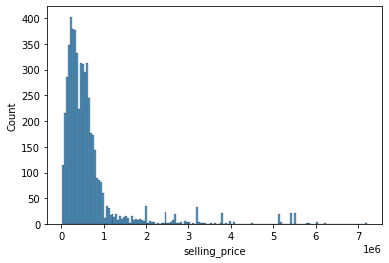

In [58]:
sns.histplot(x='selling_price', data=train_data)

**Histograma do log da variável resposta.**

<AxesSubplot:xlabel='selling_price', ylabel='Count'>

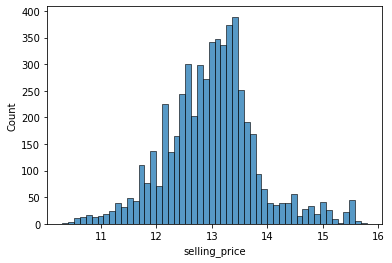

In [59]:
sns.histplot(x= np.log(train_data['selling_price']), data=train_data)

É possível notar que quando aplicamos o log na variável resposta, ou seja, o selling_price, a distribuição se assemelha com uma normal.

In [60]:
train_data.describe()

,selling_price,km_driven,mileage,engine,max_power,torque,seats,age,fuel_Diesel,fuel_LPG,...,name1_Maruti,name1_Mercedes-Benz,name1_Mitsubishi,name1_Nissan,name1_Renault,name1_Skoda,name1_Tata,name1_Toyota,name1_Volkswagen,name1_Volvo
count,5.531000e+03,5.531000e+03,5531.000000,5531.000000,5531.000000,5531.000000,5531.000000,5531.000000,5531.000000,5531.000000,...,5531.000000,5531.000000,5531.000000,5531.000000,5531.000000,5531.000000,5531.000000,5531.000000,5531.000000,5531.000000
mean,6.396651e+05,6.926906e+04,24.243196,1458.589405,91.242470,176.499383,5.422528,7.079190,0.544748,0.004158,...,0.297776,0.005966,0.001627,0.009582,0.029651,0.012837,0.090942,0.058760,0.023323,0.007774
std,7.858599e+05,5.139751e+04,4.849491,504.526402,35.127503,89.472385,0.960857,3.873994,0.498039,0.064357,...,0.457322,0.077018,0.040309,0.097428,0.169638,0.112580,0.287553,0.235196,0.150941,0.087837
min,2.999900e+04,1.000000e+00,11.250000,624.000000,34.200000,47.073600,2.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.650000e+05,3.500000e+04,20.975000,1197.000000,68.050000,111.799800,5.000000,4.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000e+05,6.000000e+04,24.125000,1248.000000,82.000000,160.000000,5.000000,6.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.750000e+05,9.575000e+04,27.887500,1582.000000,102.000000,205.000000,5.000000,9.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.200000e+06,1.500000e+06,35.500000,3604.000000,280.000000,620.000000,10.000000,27.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Bar plot Age**

<AxesSubplot:xlabel='age', ylabel='Count'>

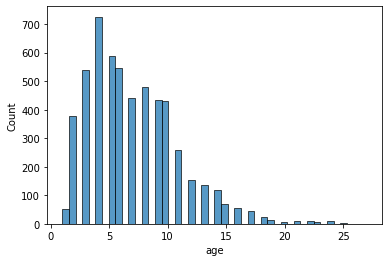

In [61]:
sns.histplot(x='age', data=train_data)

**Bar plot km_driven**

<AxesSubplot:xlabel='km_driven', ylabel='Count'>

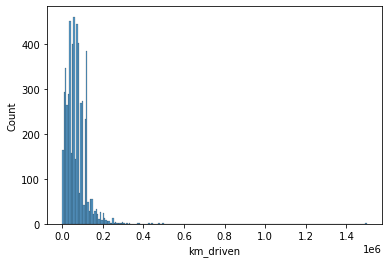

In [62]:
sns.histplot(x='km_driven', data=train_data)

**Fuel**

In [63]:
train_data['fuel_Diesel'].value_counts()

1    3013
0    2518
Name: fuel_Diesel, dtype: int64

In [64]:
train_data['fuel_LPG'].value_counts()

0    5508
1      23
Name: fuel_LPG, dtype: int64

In [65]:
train_data['fuel_Petrol'].value_counts()

0    3075
1    2456
Name: fuel_Petrol, dtype: int64

**Seller type**

In [66]:
train_data['seller_type_Individual'].value_counts()

1    4612
0     919
Name: seller_type_Individual, dtype: int64

In [67]:
train_data['seller_type_Trustmark Dealer'].value_counts()

0    5374
1     157
Name: seller_type_Trustmark Dealer, dtype: int64

**Transmission**

In [68]:
train_data['transmission_Manual'].value_counts()

1    4810
0     721
Name: transmission_Manual, dtype: int64

**Owner**

In [69]:
train_data['owner_Fourth & Above Owner'].value_counts()

0    5420
1     111
Name: owner_Fourth & Above Owner, dtype: int64

In [70]:
train_data['owner_Second Owner'].value_counts()

0    4102
1    1429
Name: owner_Second Owner, dtype: int64

In [71]:
train_data['owner_Test Drive Car'].value_counts()

0    5529
1       2
Name: owner_Test Drive Car, dtype: int64

In [72]:
train_data['owner_Third Owner'].value_counts()

0    5173
1     358
Name: owner_Third Owner, dtype: int64

**Matriz de correlação**

<AxesSubplot:>

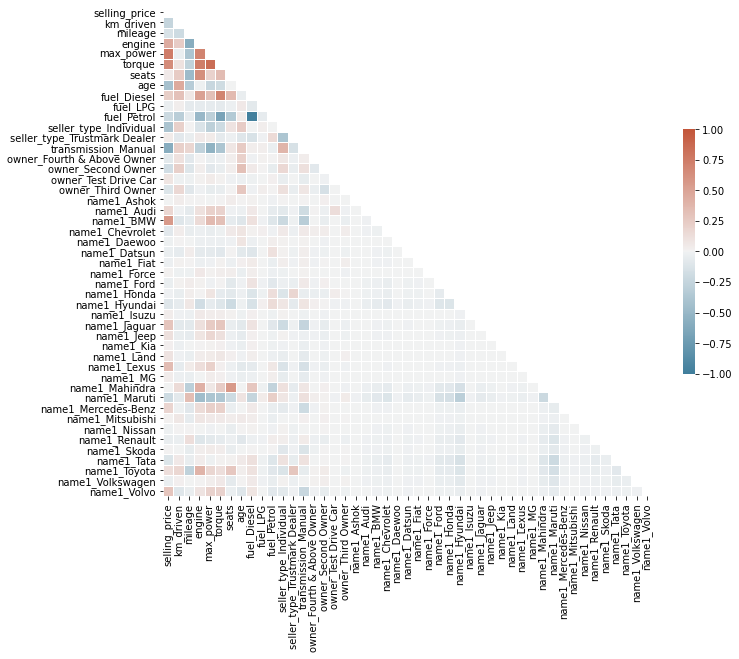

In [73]:
corr = train_data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,vmin = -1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## 4) Criação do modelo para predição.

Temos que Nossa base de treino Pós Pré-processamento:


Separando agora em teste temos

In [74]:

X = train_data.drop(['selling_price'],axis=1)
y = train_data['selling_price']
train_data.info()

train_data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 5531 entries, 2 to 5636
Data columns (total 47 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   selling_price                 5531 non-null   int32  
 1   km_driven                     5531 non-null   int32  
 2   mileage                       5531 non-null   float32
 3   engine                        5531 non-null   int64  
 4   max_power                     5531 non-null   float64
 5   torque                        5531 non-null   float64
 6   seats                         5531 non-null   float64
 7   age                           5531 non-null   int32  
 8   fuel_Diesel                   5531 non-null   uint8  
 9   fuel_LPG                      5531 non-null   uint8  
 10  fuel_Petrol                   5531 non-null   uint8  
 11  seller_type_Individual        5531 non-null   uint8  
 12  seller_type_Trustmark Dealer  5531 non-null   uint8  
 13  transmis

,selling_price,km_driven,mileage,engine,max_power,torque,seats,age,fuel_Diesel,fuel_LPG,...,name1_Maruti,name1_Mercedes-Benz,name1_Mitsubishi,name1_Nissan,name1_Renault,name1_Skoda,name1_Tata,name1_Toyota,name1_Volkswagen,name1_Volvo
count,5.531000e+03,5.531000e+03,5531.000000,5531.000000,5531.000000,5531.000000,5531.000000,5531.000000,5531.000000,5531.000000,...,5531.000000,5531.000000,5531.000000,5531.000000,5531.000000,5531.000000,5531.000000,5531.000000,5531.000000,5531.000000
mean,6.396651e+05,6.926906e+04,24.243196,1458.589405,91.242470,176.499383,5.422528,7.079190,0.544748,0.004158,...,0.297776,0.005966,0.001627,0.009582,0.029651,0.012837,0.090942,0.058760,0.023323,0.007774
std,7.858599e+05,5.139751e+04,4.849491,504.526402,35.127503,89.472385,0.960857,3.873994,0.498039,0.064357,...,0.457322,0.077018,0.040309,0.097428,0.169638,0.112580,0.287553,0.235196,0.150941,0.087837
min,2.999900e+04,1.000000e+00,11.250000,624.000000,34.200000,47.073600,2.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.650000e+05,3.500000e+04,20.975000,1197.000000,68.050000,111.799800,5.000000,4.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000e+05,6.000000e+04,24.125000,1248.000000,82.000000,160.000000,5.000000,6.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.750000e+05,9.575000e+04,27.887500,1582.000000,102.000000,205.000000,5.000000,9.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.200000e+06,1.500000e+06,35.500000,3604.000000,280.000000,620.000000,10.000000,27.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)


x train:  (4424, 46)
x test:  (1107, 46)
y train:  (4424,)
y test:  (1107,)


In [76]:
y_test

1841    2475000
4134     180000
1515     370000
3531     385000
157      180000
         ...   
1728     200000
706      840000
2531     600000
569      470000
819      290000
Name: selling_price, Length: 1107, dtype: int32

Função para obter o R2 Dos modelos

In [77]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

r2_train_scores = []
r2_test_scores = []
cv_mean = []

def car_price_prediction_model(model):
    model.fit(X_train, y_train)

    #R2 score da base de treino
    y_train_pred = model.predict(X_train)
    r2_train = r2_score(y_train, y_train_pred)
    r2_train_scores.append(round(r2_train,2))

    #R2 score da base de teste
    y_test_pred = model.predict(X_test)
    r2_test = r2_score(y_test, y_test_pred)
    r2_test_scores.append(round(r2_test,2))

    # R2 score utilizando o cross validation
    cv_training = cross_val_score(model, X_train, y_train, cv=5)
    cv_mean_training = cv_training.mean()
    cv_mean.append(round(cv_mean_training,2))



    # Printing each score
    print(" R2 score do treino: ",round(r2_train,2))
    print("R2 score do teste: ",round(r2_test,2))
    print("R2 score do cross validation: ", cv_training)
    print("R2 score na media cross validation: ",round(cv_mean_training,2))


    fig, ax = plt.subplots(1,2,figsize = (12,6))
    ax[0].set_title('Analise de residuos da base de treino')
    sns.distplot((y_train-y_train_pred),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_pred')

    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_test_pred)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')

    plt.show()



In [78]:

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingRegressor()

learning_rate = [0.001, 0.01, 0.1, 0.2]
n_estimators=list(range(500,1000,100))
max_depth=list(range(4,9,4))
min_samples_split=list(range(4,9,2))
min_samples_leaf=[1,2,5,7]
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)

 R2 score do treino:  1.0
R2 score do teste:  0.97
R2 score do cross validation:  [0.96706157 0.97077006 0.96680224 0.98282082 0.954934  ]
R2 score na media cross validation:  0.97


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


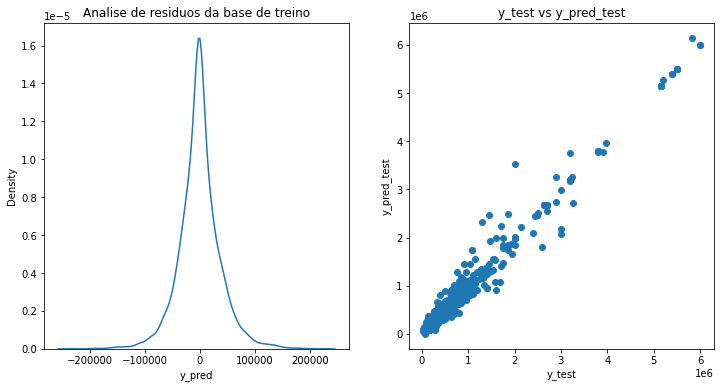

In [79]:
car_price_prediction_model(gb_rs)

In [80]:
test_data.head()
y_pred = gb_rs.predict(test_data)
data = {'Id': Id_listTest,
        'selling_price': y_pred
        }
df = pd.DataFrame(data, columns = ['Id', 'selling_price'])
df.to_csv('submission.csv',index=False)